In [ ]:
!pip install pyLDAvis
!pip install praw

In [ ]:
# Importing modules to be used in the course of training
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import pandas as pd
import os
import csv
import requests
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('all')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
from nltk.stem import WordNetLemmatizer
import gdown
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nl

In [ ]:
# # First Your API key
# api_key = 'Api keys'

# # Base URL for the Article Search API
# base_url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'

# # Parameters for the API request
# params = {
#     'q': 'Responsible A.I.',  # Your search query
#     'api-key': api_key,
#     'begin_date': '20100101',  # Start date (YYYYMMDD)
#     'end_date': '20240101',    # End date (YYYYMMDD)
#     'page': 31,  # Start with page 0 (first page)
#     'sort': 'newest'
# }

# articles_data = []  # List to store all articles

# # Make multiple requests to fetch all articles
# while True:
#     # Make the API request
#     response = requests.get(base_url, params=params)

#     # Check if the request was successful (status code 200)
#     if response.status_code == 200:
#         # Parse the JSON response
#         data = response.json()
#         # Extract article titles, abstracts, and lead paragraphs
#         articles_data.extend([(article['headline']['main'], article.get('abstract', ''), article.get('lead_paragraph', '')) for article in data['response']['docs']])
#         # Check if there are more pages of results
#         if data['response']['meta']['offset'] + len(data['response']['docs']) < data['response']['meta']['hits']:
#             # Increment page number for next request
#             params['page'] += 1
#         else:
#             # Stop fetching articles if all pages have been retrieved
#             break
#     else:
#         print('Error:', response.status_code)
#         break

# # Export all articles to a CV file
# with open('nytimes_articlesRAI6.csv', mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Article_Title', 'Abstract', 'Lead_Paragraph'])
#     writer.writerows(articles_data)

# print('Articles exported to nytimes_articles.csv')


In [ ]:
# df = pd.read_csv('/content/nytimes_articlesRAI5.csv')

In [ ]:
# #CSV to be combined
# filenames = ['Dataset.csv', 'Dataset2.csv',]

# # List to store DataFrames
# dfs = []

# # Read each CSV file and append to the list
# for filename in filenames:
#     df = pd.read_csv(filename)
#     dfs.append(df)


In [ ]:
# # Concatenate DataFrames
# combined_df = pd.concat(dfs, ignore_index=True)
# combined_df

In [ ]:
# all_df = pd.concat([first, second], ignore_index=True)


In [ ]:
# #remove duplicate rows
# df = combined_df.drop_duplicates()
# df

In [ ]:
# # Save the combined DataFrame to a CSV file
# combined_df.to_csv('full_data.csv', index=False)


In [ ]:
# URL of the dataset to be downloaded from Github repository
url = 'https://raw.githubusercontent.com/ezzybala/NLP-task/main/new_search_data.csv'

# Path to save the downloaded dataset
output_path = '/content/complete_data.csv'

# Downloading the dataset from the specified URL and saving it to the specified path
gdown.download(url, output_path, quiet=False)

# Reading the downloaded CSV file into a pandas DataFrame
df = pd.read_csv(output_path)
df

Downloading...
From: https://raw.githubusercontent.com/ezzybala/NLP-task/main/new_search_data.csv
To: /content/complete_data.csv
203kB [00:00, 6.84MB/s]                    


,Article_Title,Abstract,Lead_Paragraph
0,Chief Justice Roberts Sees Promise and Danger ...,"In his year-end report, Chief Justice John G. ...",Chief Justice John G. Roberts Jr. devoted his ...
1,Michael Cohen Used Artificial Intelligence in ...,Donald Trump’s former fixer had sought an earl...,"Michael D. Cohen, the onetime fixer for former..."
2,Building Trust in A.I.,How IBM is helping companies scale generative ...,NaN
3,Should A.I. Accelerate? Decelerate? The Answer...,The OpenAI debacle illustrates the way the tec...,"The near implosion of OpenAI, a world leader i..."
4,Artificial Intelligence Is an Unreliable Narrator,Approaching A.I. like we might any other art f...,This feature is part of a series called Turnin...
...,...,...,...
494,Morning Agenda: Activist Investors and Billion...,Bernanke’s Frank Look at Lehman Brothers | Sup...,ACTIVIST INVESTORS AND BILLION-DOLLAR BETS | E...
495,"Cambridge, Cabs and Copenhagen: My Route to Ex...",The fear that technology might threaten our su...,"In Copenhagen the summer before last, I shared..."
496,The Future of Moral Machines,Many think the idea of ethically sensitive mac...,NaN
497,"John McCarthy, 84, Dies; Computer Design Pioneer","Mr. McCarthy, a computer scientist, helped des...","John McCarthy, a computer scientist who helped..."


In [ ]:
# describe the dataset
df.describe(include='all')


,Article_Title,Abstract,Lead_Paragraph
count,499,498,482
unique,463,457,429
top,What (if Anything) Did You Change Your Mind Ab...,Here’s what you need to know at the end of the...,To the Editor:
freq,2,3,12


In [ ]:
#displays t
df.shape

(499, 3)

In [ ]:
df = df.drop_duplicates()


In [ ]:
# Handle NaN values in the 'Body' column
df['Abstract'] = df['Abstract'].fillna('')

# Remove punctuation
df['Abstract'] = df['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['Abstract'] = \
df['Abstract'].map(lambda x: x.lower())

# Print out the first rows of papers
df['Abstract'].head()

<ipython-input-56-c7ab0ca52925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstract'] = df['Abstract'].fillna('')
<ipython-input-56-c7ab0ca52925>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Abstract'] = df['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-56-c7ab0ca52925>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

0    in his year-end report chief justice john g ro...
1    donald trump’s former fixer had sought an earl...
2    how ibm is helping companies scale generative ...
3    the openai debacle illustrates the way the tec...
4    approaching ai like we might any other art for...
Name: Abstract, dtype: object

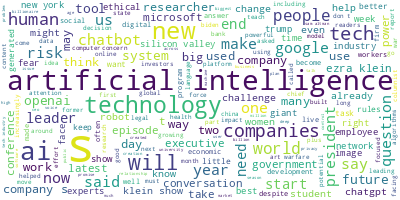

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df['Abstract'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop = stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

In [ ]:
df['clean_abstract'] = df['Abstract'].apply(lambda x: remove_stopwords(x))
df

<ipython-input-59-d922152f0fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_abstract'] = df['Abstract'].apply(lambda x: remove_stopwords(x))


,Article_Title,Abstract,Lead_Paragraph,clean_abstract
0,Chief Justice Roberts Sees Promise and Danger ...,in his year-end report chief justice john g ro...,Chief Justice John G. Roberts Jr. devoted his ...,year-end report chief justice john g roberts j...
1,Michael Cohen Used Artificial Intelligence in ...,donald trump’s former fixer had sought an earl...,"Michael D. Cohen, the onetime fixer for former...",donald trump’s former fixer sought early end c...
2,Building Trust in A.I.,how ibm is helping companies scale generative ...,NaN,ibm helping companies scale generative ai resp...
3,Should A.I. Accelerate? Decelerate? The Answer...,the openai debacle illustrates the way the tec...,"The near implosion of OpenAI, a world leader i...",openai debacle illustrates way tech world cont...
4,Artificial Intelligence Is an Unreliable Narrator,approaching ai like we might any other art for...,This feature is part of a series called Turnin...,approaching ai like might art form — dose skep...
...,...,...,...,...
492,The Happiness Code,a new approach to self-improvement is taking o...,"Last summer, three dozen people, mostly progra...",new approach self-improvement taking silicon v...
493,Toyota Invests $1 Billion in Artificial Intell...,the initiative the toyota research institute w...,"PALO ALTO, Calif. — Silicon Valley is diving i...",initiative toyota research institute create on...
494,Morning Agenda: Activist Investors and Billion...,bernanke’s frank look at lehman brothers | sup...,ACTIVIST INVESTORS AND BILLION-DOLLAR BETS | E...,bernanke’s frank look lehman brothers | suprem...
495,"Cambridge, Cabs and Copenhagen: My Route to Ex...",the fear that technology might threaten our su...,"In Copenhagen the summer before last, I shared...",fear technology might threaten survival often ...


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts, custom_stopwords=None):
    if custom_stopwords is None:
        custom_stopwords = []

    all_stopwords = stop_words + custom_stopwords

    return [[word for word in simple_preprocess(str(doc))
             if word not in all_stopwords] for doc in texts]
custom_stopwords = ["like", "also", "would", "always", "often", "two", "must", "us", "could", "may", "every"]

data = df.clean_abstract.values.tolist()
data_words = list(sent_to_words(data))


# remove stop words
# data_words = remove_stopwords(data_words)
data_words= remove_stopwords(data_words, custom_stopwords=custom_stopwords)
data_words

print(data_words[:1][0][:100])

['year', 'end', 'report', 'chief', 'justice', 'john', 'roberts', 'jr', 'focused', 'new', 'technology', 'steering', 'clear', 'supreme', 'court', 'ethics', 'donald', 'trump', 'criminal', 'cases']


In [ ]:
from nltk.stem import WordNetLemmatizer
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()


# Function to lemmatize a word
def lemmatize_word(word):
    # Use a try-except block to handle exceptions
    try:
        return lemmatizer.lemmatize(word)
    except Exception as e:
        # If an exception occurs, return the original word
        return word

# Apply lemmatization to each word in the list
lemmatized_words = [lemmatize_word(word) for word in data_words]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(lemmatized_words)

# Create Corpus
texts = lemmatized_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [ ]:
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"ai" + 0.010*"intelligence" + 0.009*"artificial" + 0.009*"technology" '
  '+ 0.008*"new" + 0.007*"companies" + 0.007*"people" + 0.005*"many" + '
  '0.004*"one" + 0.004*"get"'),
 (1,
  '0.010*"artificial" + 0.010*"intelligence" + 0.007*"new" + 0.007*"show" + '
  '0.005*"technology" + 0.004*"klein" + 0.004*"ezra" + 0.004*"episode" + '
  '0.004*"people" + 0.004*"human"'),
 (2,
  '0.014*"ai" + 0.009*"artificial" + 0.009*"intelligence" + 0.008*"technology" '
  '+ 0.007*"tech" + 0.005*"new" + 0.005*"president" + 0.005*"said" + '
  '0.004*"google" + 0.004*"companies"'),
 (3,
  '0.009*"artificial" + 0.008*"intelligence" + 0.005*"ai" + 0.004*"new" + '
  '0.003*"world" + 0.003*"company" + 0.003*"social" + 0.003*"made" + '
  '0.003*"built" + 0.003*"google"'),
 (4,
  '0.010*"artificial" + 0.010*"intelligence" + 0.009*"new" + 0.006*"tech" + '
  '0.005*"ai" + 0.005*"company" + 0.005*"start" + 0.004*"technology" + '
  '0.004*"end" + 0.004*"need"')]


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.085877 -0.048726       1        1  25.109537
2     -0.053016  0.084849       2        1  23.503861
4      0.017365 -0.042047       3        1  17.780240
3      0.067385  0.054619       4        1  17.518277
1      0.054142 -0.048695       5        1  16.088085, topic_info=         Term       Freq      Total Category  logprob  loglift
550      show   9.000000   9.000000  Default  30.0000  30.0000
141      many   8.000000   8.000000  Default  29.0000  29.0000
131    people  14.000000  14.000000  Default  28.0000  28.0000
718      need   8.000000   8.000000  Default  27.0000  27.0000
571      ezra   6.000000   6.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
82   industry   1.810012   9.187348   Topic5  -6.1160   0.2026
45     openai   1.782705   9.015154   Topic5  -6.1312   0.2063
61       make   1.779117   9.136242   Topic5  -6.1332   0.1910
348  chatbots   1.683311   7.155476   Topic5  -6.1886   0.3800
486    social   1.668254   7.138273   Topic5  -6.1975   0.3734

[365 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1559      1  0.955842         abuse
1725      3  0.789832  accelerating
851       4  0.393372     accenture
851       5  0.393372     accenture
1645      4  0.518871      accounts
...     ...       ...           ...
373       1  0.177326          york
373       3  0.177326          york
373       5  0.531979          york
1734      3  0.399627       youtube
1734      5  0.399627       youtube

[554 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])